In [44]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('Cleaned Data 1.csv',index_col= 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6890 entries, Wii Sports to 15 Days
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Platform              6890 non-null   object 
 1   Year_of_Release       6890 non-null   float64
 2   Genre                 6890 non-null   object 
 3   Publisher             6889 non-null   object 
 4   NA_Sales              6890 non-null   float64
 5   EU_Sales              6890 non-null   float64
 6   JP_Sales              6890 non-null   float64
 7   Other_Sales           6890 non-null   float64
 8   Global_Sales          6890 non-null   float64
 9   Critic_Score          6890 non-null   float64
 10  Critic_Count          6890 non-null   float64
 11  User_Score            6890 non-null   float64
 12  User_Count            6890 non-null   float64
 13  Developer             6890 non-null   object 
 14  Rating                6826 non-null   object 
 15  New_User_Score

## Decision Tree 

In [46]:
User_Score = pd.DataFrame(df['New_User_Score'])  # Response
Global_Sales = pd.DataFrame(df['Global_Sales'])      # Predictor

In [47]:
User_Score["New_User_Score"].value_counts()

0    4483
1    2407
Name: New_User_Score, dtype: int64

In [48]:
Global_Sales.describe()

,Global_Sales
count,6890.000000
mean,0.771851
std,1.955287
min,0.010000
25%,0.110000
50%,0.290000
75%,0.750000
max,82.530000


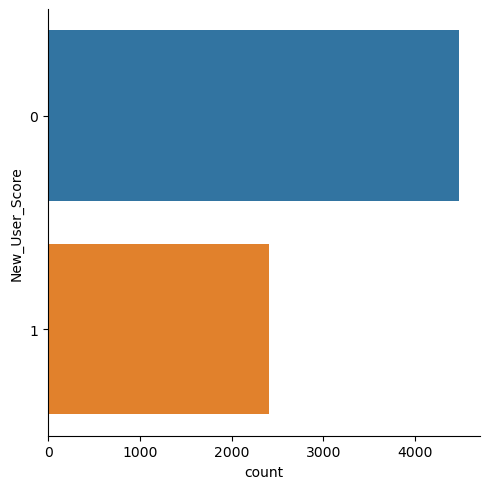

In [49]:
# Count Plot for Legendary Train
sb.catplot(y = "New_User_Score", data = User_Score, kind = "count")
plt.show()

## Decision tree of Global_Sales against User_Score

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.647133526850508

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6676342525399129



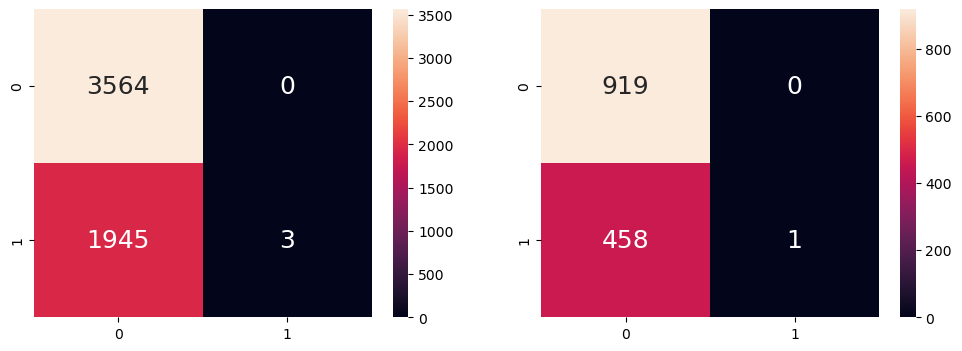

In [74]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(Global_Sales, User_Score, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
train_cm = confusion_matrix(y_train, y_train_pred)
sb.heatmap(train_cm,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
test_cm = confusion_matrix(y_test, y_test_pred)
sb.heatmap(test_cm, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


plt.show()

In [75]:
#Calculation for train set
fp_train = train_cm[0][1]
tn_train = train_cm[0][0]
tp_train = train_cm[1][1]
fn_train = train_cm[1][0]
fpr_train = fp_train / float(fp_train + tn_train)
tnr_train = tn_train / float(fp_train + tn_train)
tpr_train = tp_train / float(tp_train + fn_train)
fnr_train = fn_train / float(tp_train + fn_train)
print("False positive rate for train set:", fpr_train)
print("True negative rate for train set:", tnr_train)
print("True positive rate for train set:", tpr_train)
print("False negative rate for train set:", fnr_train)
print()

#Calculation for test set
fp_test = test_cm[0][1]
tn_test = test_cm[0][0]
tp_test = test_cm[1][1]
fn_test = test_cm[1][0]
fpr_test = fp_test / float(fp_test + tn_test)
tnr_test = tn_test / float(fp_test + tn_test)
tpr_test = tp_test / float(tp_test + fn_test)
fnr_test = fn_test / float(tp_test + fn_test)
print("False positive rate for test set:", fpr_test)
print("True negative rate for test set:", tnr_test)
print("True positive rate for test set:", tpr_test)
print("False negative rate for test set:", fnr_test)

False positive rate for train set: 0.0
True negative rate for train set: 1.0
True positive rate for train set: 0.001540041067761807
False negative rate for train set: 0.9984599589322382

False positive rate for test set: 0.0
True negative rate for test set: 1.0
True positive rate for test set: 0.002178649237472767
False negative rate for test set: 0.9978213507625272


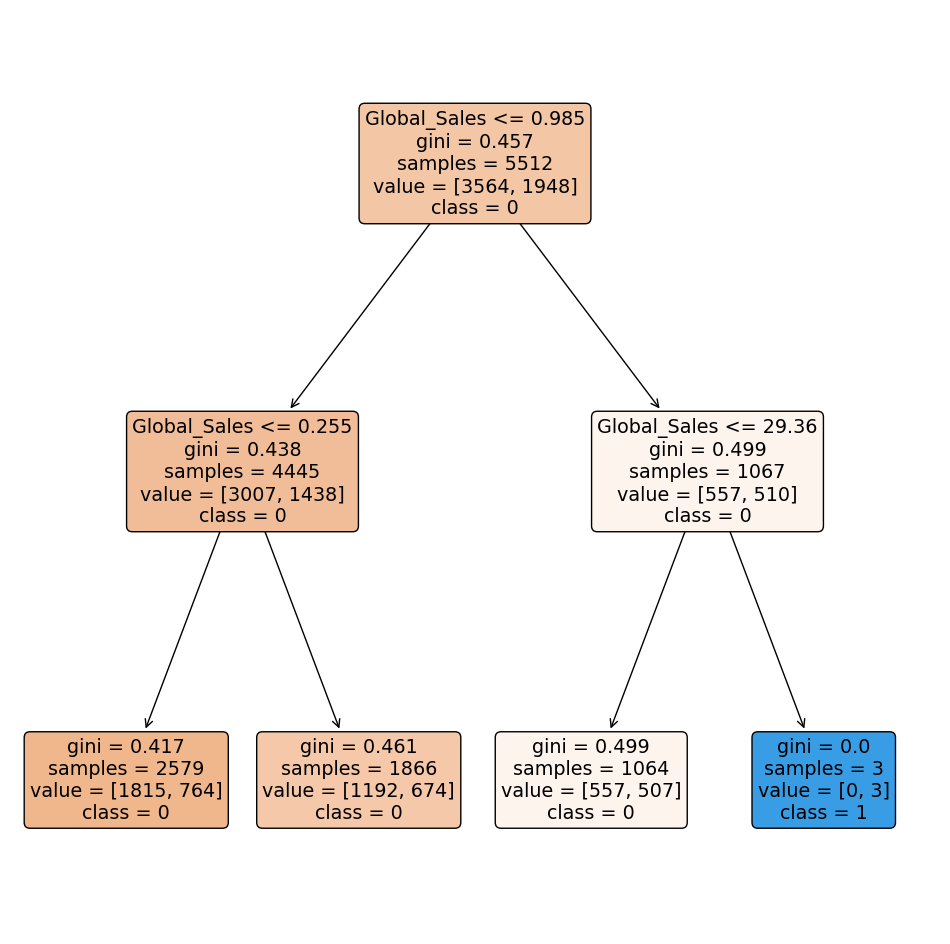

In [76]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Global_Sales"], 
          class_names=["0","1"])
plt.show()

## Decision tree of Developer_Class against User_Score

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.658744557329463

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6320754716981132



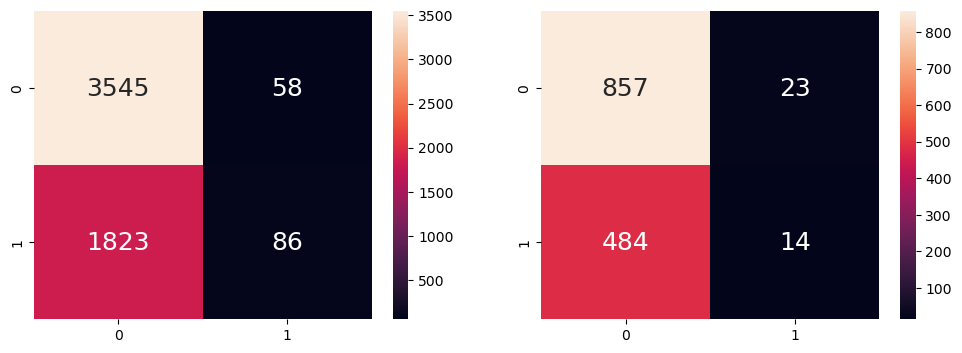

In [77]:
Developer_class = pd.DataFrame(df['Developer_clas'])

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(Global_Sales, User_Score, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
train_cm = confusion_matrix(y_train, y_train_pred)
sb.heatmap(train_cm,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
test_cm = confusion_matrix(y_test, y_test_pred)
sb.heatmap(test_cm, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [78]:
#Calculation for train set
fp_train = train_cm[0][1]
tn_train = train_cm[0][0]
tp_train = train_cm[1][1]
fn_train = train_cm[1][0]
fpr_train = fp_train / float(fp_train + tn_train)
tnr_train = tn_train / float(fp_train + tn_train)
tpr_train = tp_train / float(tp_train + fn_train)
fnr_train = fn_train / float(tp_train + fn_train)
print("False positive rate for train set:", fpr_train)
print("True negative rate for train set:", tnr_train)
print("True positive rate for train set:", tpr_train)
print("False negative rate for train set:", fnr_train)
print()

#Calculation for test set
fp_test = test_cm[0][1]
tn_test = test_cm[0][0]
tp_test = test_cm[1][1]
fn_test = test_cm[1][0]
fpr_test = fp_test / float(fp_test + tn_test)
tnr_test = tn_test / float(fp_test + tn_test)
tpr_test = tp_test / float(tp_test + fn_test)
fnr_test = fn_test / float(tp_test + fn_test)
print("False positive rate for test set:", fpr_test)
print("True negative rate for test set:", tnr_test)
print("True positive rate for test set:", tpr_test)
print("False negative rate for test set:", fnr_test)

False positive rate for train set: 0.016097696364140993
True negative rate for train set: 0.983902303635859
True positive rate for train set: 0.045049764274489264
False negative rate for train set: 0.9549502357255107

False positive rate for test set: 0.026136363636363635
True negative rate for test set: 0.9738636363636364
True positive rate for test set: 0.028112449799196786
False negative rate for test set: 0.9718875502008032


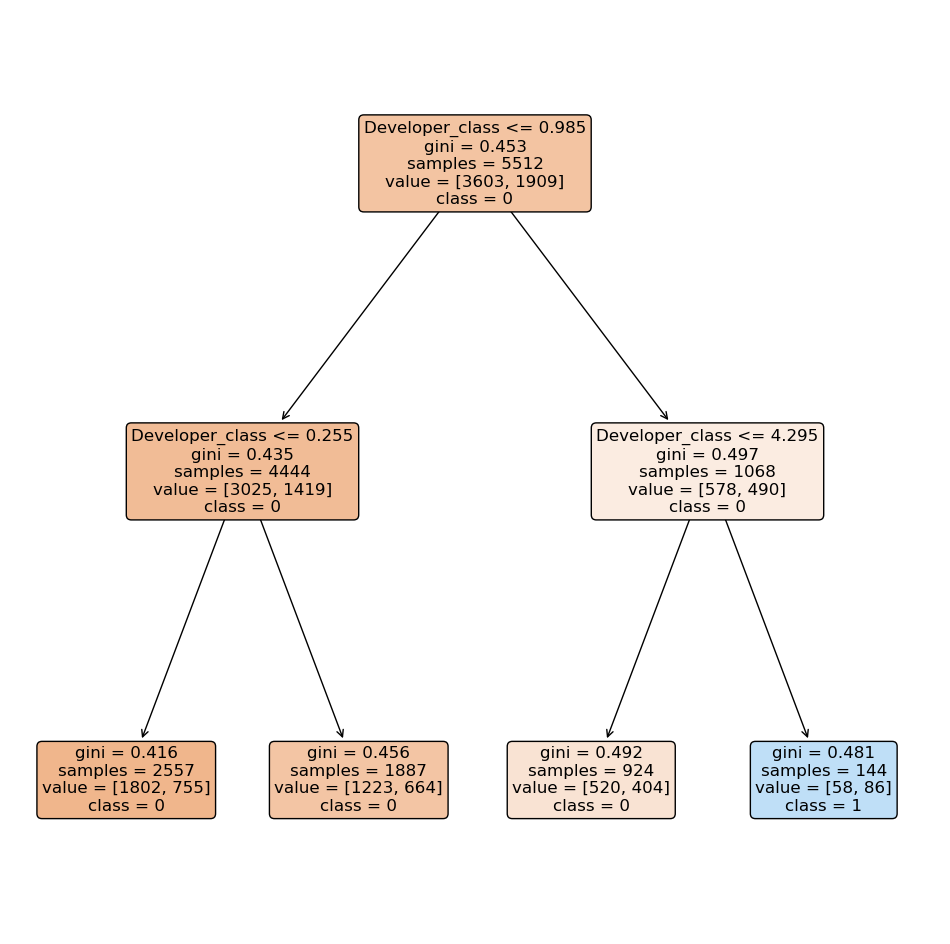

In [79]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Developer_class"], 
          class_names=["0","1"])
plt.show()

## Classification tree of years_since_release against User_score

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6839622641509434

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6799709724238027



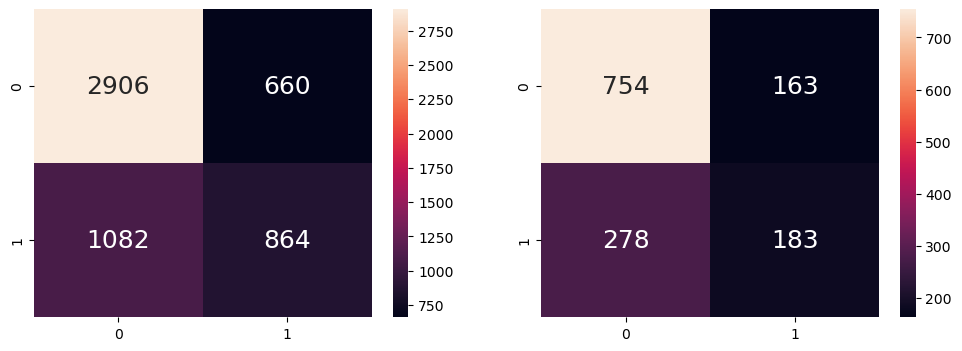

In [80]:
years_since_release = pd.DataFrame(df['years_since_release'])

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(years_since_release, User_Score, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
train_cm = confusion_matrix(y_train, y_train_pred)
sb.heatmap(train_cm,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
test_cm = confusion_matrix(y_test, y_test_pred)
sb.heatmap(test_cm, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [81]:
#Calculation for train set
fp_train = train_cm[0][1]
tn_train = train_cm[0][0]
tp_train = train_cm[1][1]
fn_train = train_cm[1][0]
fpr_train = fp_train / float(fp_train + tn_train)
tnr_train = tn_train / float(fp_train + tn_train)
tpr_train = tp_train / float(tp_train + fn_train)
fnr_train = fn_train / float(tp_train + fn_train)
print("False positive rate for train set:", fpr_train)
print("True negative rate for train set:", tnr_train)
print("True positive rate for train set:", tpr_train)
print("False negative rate for train set:", fnr_train)
print()

#Calculation for test set
fp_test = test_cm[0][1]
tn_test = test_cm[0][0]
tp_test = test_cm[1][1]
fn_test = test_cm[1][0]
fpr_test = fp_test / float(fp_test + tn_test)
tnr_test = tn_test / float(fp_test + tn_test)
tpr_test = tp_test / float(tp_test + fn_test)
fnr_test = fn_test / float(tp_test + fn_test)
print("False positive rate for test set:", fpr_test)
print("True negative rate for test set:", tnr_test)
print("True positive rate for test set:", tpr_test)
print("False negative rate for test set:", fnr_test)

False positive rate for train set: 0.1850813236118901
True negative rate for train set: 0.8149186763881099
True positive rate for train set: 0.44398766700924974
False negative rate for train set: 0.5560123329907503

False positive rate for test set: 0.1777535441657579
True negative rate for test set: 0.822246455834242
True positive rate for test set: 0.3969631236442516
False negative rate for test set: 0.6030368763557483


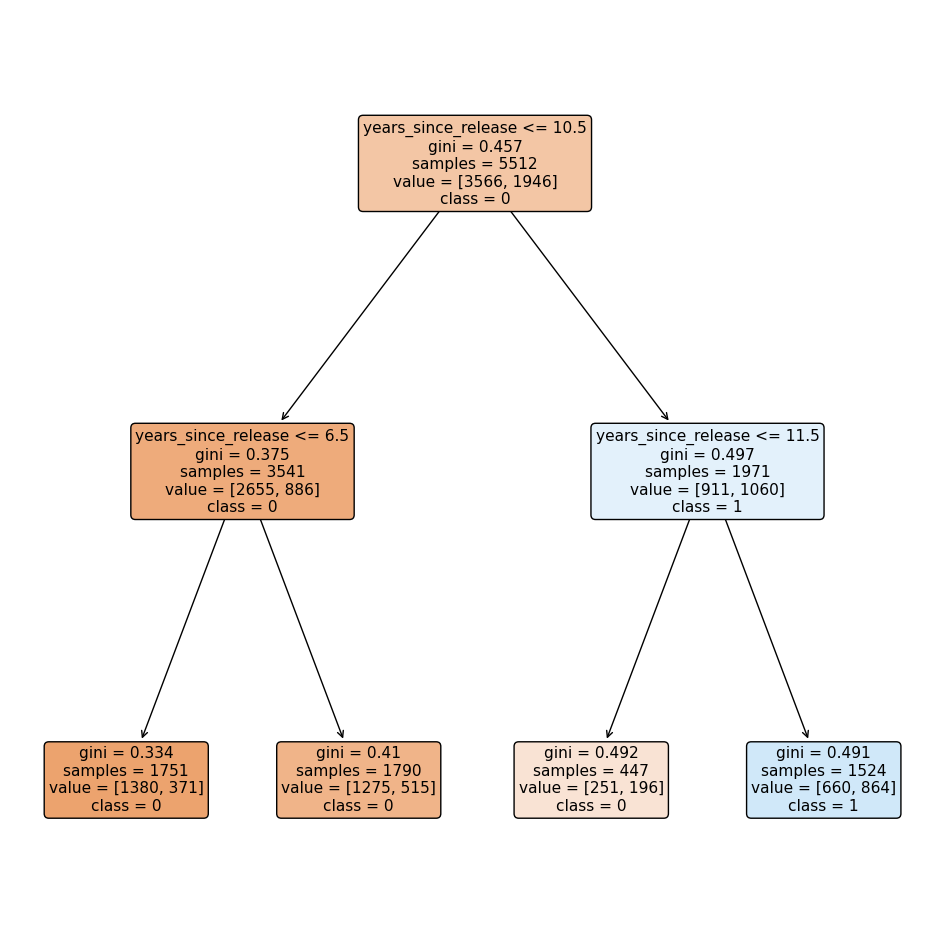

In [82]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["years_since_release"], 
          class_names=["0","1"])
plt.show()

## Classification Tree for Critic_Score against User_score

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6968432510885341

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.681422351233672



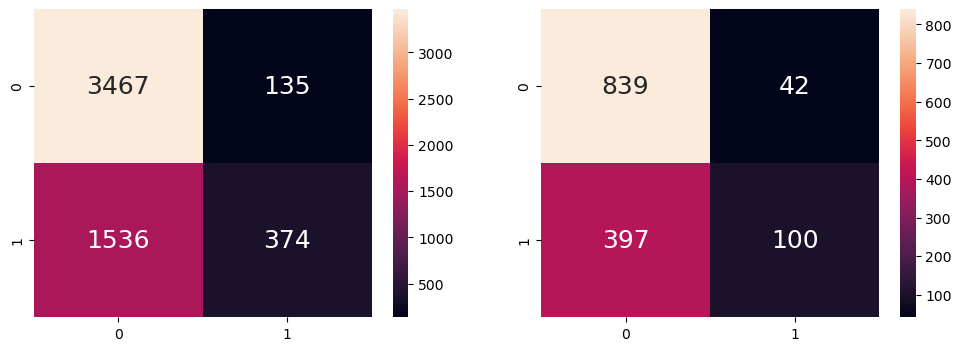

In [83]:
critic_score = pd.DataFrame(df['Critic_Score'])

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(critic_score, User_Score, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
train_cm = confusion_matrix(y_train, y_train_pred)
sb.heatmap(train_cm,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
test_cm = confusion_matrix(y_test, y_test_pred)
sb.heatmap(test_cm, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [84]:
#Calculation for train set
fp_train = train_cm[0][1]
tn_train = train_cm[0][0]
tp_train = train_cm[1][1]
fn_train = train_cm[1][0]
fpr_train = fp_train / float(fp_train + tn_train)
tnr_train = tn_train / float(fp_train + tn_train)
tpr_train = tp_train / float(tp_train + fn_train)
fnr_train = fn_train / float(tp_train + fn_train)
print("False positive rate for train set:", fpr_train)
print("True negative rate for train set:", tnr_train)
print("True positive rate for train set:", tpr_train)
print("False negative rate for train set:", fnr_train)
print()

#Calculation for test set
fp_test = test_cm[0][1]
tn_test = test_cm[0][0]
tp_test = test_cm[1][1]
fn_test = test_cm[1][0]
fpr_test = fp_test / float(fp_test + tn_test)
tnr_test = tn_test / float(fp_test + tn_test)
tpr_test = tp_test / float(tp_test + fn_test)
fnr_test = fn_test / float(tp_test + fn_test)
print("False positive rate for test set:", fpr_test)
print("True negative rate for test set:", tnr_test)
print("True positive rate for test set:", tpr_test)
print("False negative rate for test set:", fnr_test)

False positive rate for train set: 0.03747917823431427
True negative rate for train set: 0.9625208217656858
True positive rate for train set: 0.19581151832460733
False negative rate for train set: 0.8041884816753927

False positive rate for test set: 0.04767309875141884
True negative rate for test set: 0.9523269012485811
True positive rate for test set: 0.2012072434607646
False negative rate for test set: 0.7987927565392354


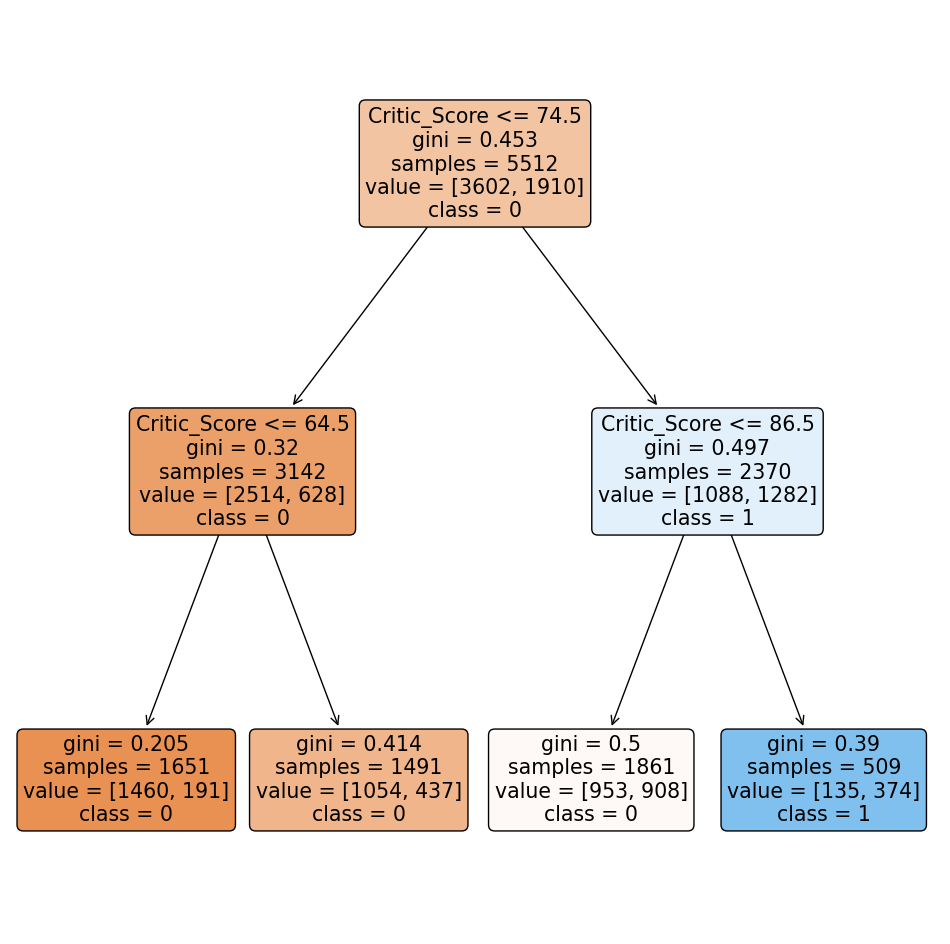

In [85]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Critic_Score"], 
          class_names=["0","1"])
plt.show()

## Multi-Variate Classification tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7325834542815675

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7264150943396226



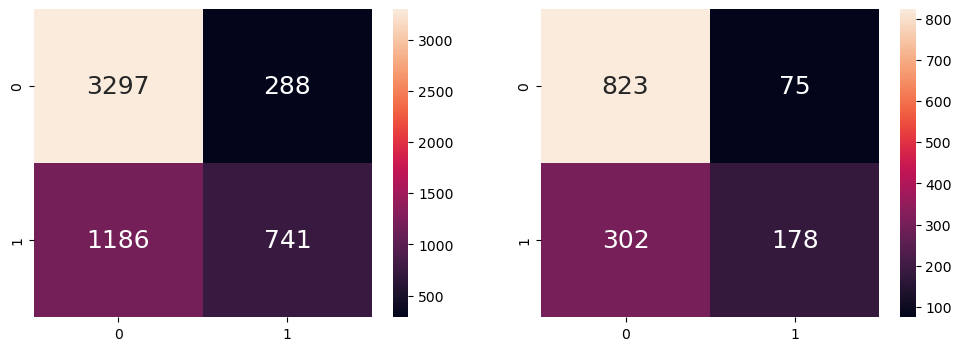

In [86]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
y = pd.DataFrame(df['New_User_Score'])
X = pd.DataFrame(df[["Critic_Score", "years_since_release", "Global_Sales", "Developer_clas"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
train_cm = confusion_matrix(y_train, y_train_pred)
sb.heatmap(train_cm,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
test_cm = confusion_matrix(y_test, y_test_pred)
sb.heatmap(test_cm, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [87]:
#Calculation for train set
fp_train = train_cm[0][1]
tn_train = train_cm[0][0]
tp_train = train_cm[1][1]
fn_train = train_cm[1][0]
fpr_train = fp_train / float(fp_train + tn_train)
tnr_train = tn_train / float(fp_train + tn_train)
tpr_train = tp_train / float(tp_train + fn_train)
fnr_train = fn_train / float(tp_train + fn_train)
print("False positive rate for train set:", fpr_train)
print("True negative rate for train set:", tnr_train)
print("True positive rate for train set:", tpr_train)
print("False negative rate for train set:", fnr_train)
print()

#Calculation for test set
fp_test = test_cm[0][1]
tn_test = test_cm[0][0]
tp_test = test_cm[1][1]
fn_test = test_cm[1][0]
fpr_test = fp_test / float(fp_test + tn_test)
tnr_test = tn_test / float(fp_test + tn_test)
tpr_test = tp_test / float(tp_test + fn_test)
fnr_test = fn_test / float(tp_test + fn_test)
print("False positive rate for test set:", fpr_test)
print("True negative rate for test set:", tnr_test)
print("True positive rate for test set:", tpr_test)
print("False negative rate for test set:", fnr_test)

False positive rate for train set: 0.0803347280334728
True negative rate for train set: 0.9196652719665271
True positive rate for train set: 0.3845355474831344
False negative rate for train set: 0.6154644525168655

False positive rate for test set: 0.08351893095768374
True negative rate for test set: 0.9164810690423163
True positive rate for test set: 0.37083333333333335
False negative rate for test set: 0.6291666666666667


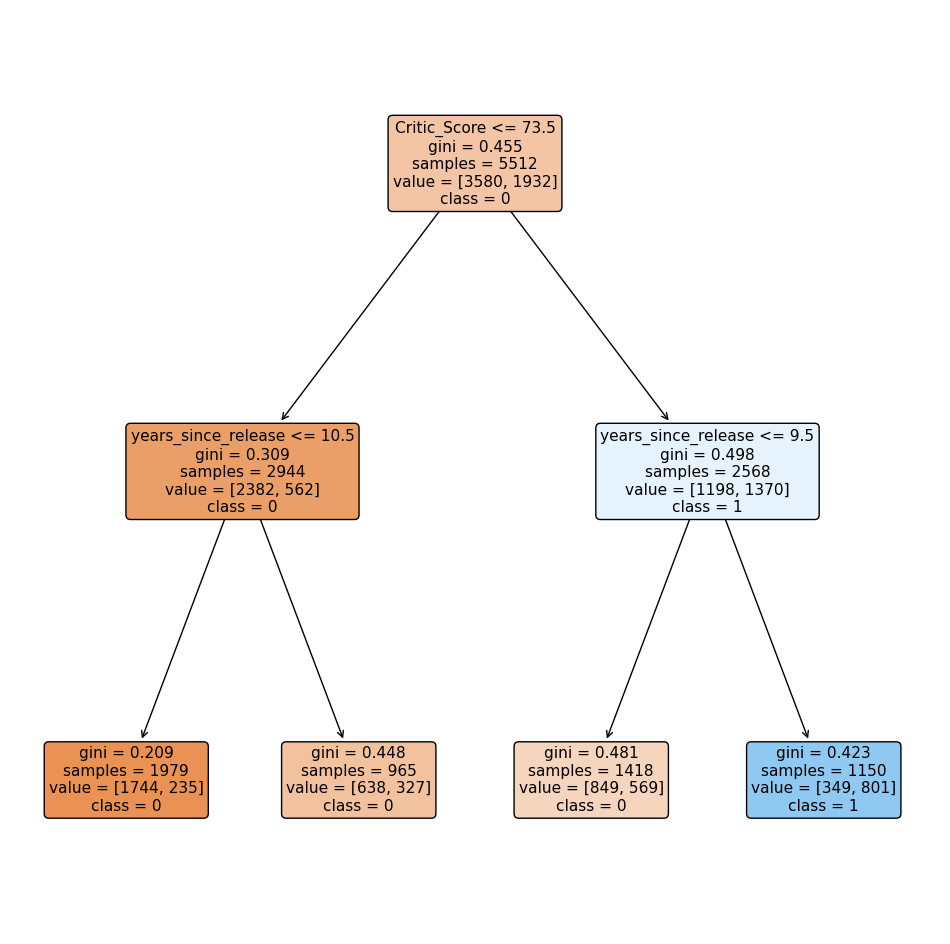

In [59]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["0","1"])
plt.show()